### How does the number of touches a player has correlate with their defensive contributions (such as tackles, interceptions, or blocks)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import dataset

In [2]:
data = pd.read_csv("../../Liverpool_players_season2020-2021_2021-2022.csv")
# print size of data
print(data.shape)
# show first 10 rows
data.head(10)


(1051, 19)


,Unnamed: 0,Player,shirt_number,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,0,Diogo Jota,20,POR,FW,24-253,60,1,0,0,0,2,2,0,0,22,1,0,0
1,1,Roberto Firmino,9,BRA,FW,29-316,30,1,0,0,0,1,1,0,0,17,1,0,1
2,2,Sadio Mané,10,SEN,LW,29-126,90,0,0,0,0,3,0,0,0,45,1,0,1
3,3,Mohamed Salah,11,EGY,RW,29-060,90,1,2,0,0,5,2,0,0,35,0,0,0
4,4,Naby Keïta,8,GUI,"LM,RM",26-185,82,0,0,0,0,0,0,0,0,52,6,0,2
5,5,Harvey Elliott,67,ENG,RM,18-132,8,0,0,0,0,0,0,0,0,7,0,0,0
6,6,James Milner,7,ENG,"CM,LM",35-222,90,0,0,0,0,0,0,1,0,81,3,2,2
7,7,Alex Oxlade-Chamberlain,15,ENG,RM,27-364,60,0,0,0,0,2,0,0,0,28,0,1,1
8,8,Fabinho,3,BRA,CM,27-295,30,0,0,0,0,0,0,0,0,25,0,0,2
9,9,Kostas Tsimikas,21,GRE,LB,25-094,90,0,0,0,0,2,1,0,0,77,3,0,1


# data preprocessing and cleaning

In [3]:
# remove irrelevant variables
data = data.drop(["shirt_number"], axis=1) 
# remove first column
data = data.iloc[:,1:]
# convert Age to numeric
data["Age"] = data["Age"].str[:2].astype(int)
# remove any rows with missing data
data = data.dropna() 
# Split the strings in the "Pos" column by comma and keep only the first position listed
data["Pos"] = data["Pos"].str.split(",", n=1, expand=True)[0]
# show first 10 rows
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,Diogo Jota,POR,FW,24,60,1,0,0,0,2,2,0,0,22,1,0,0
1,Roberto Firmino,BRA,FW,29,30,1,0,0,0,1,1,0,0,17,1,0,1
2,Sadio Mané,SEN,LW,29,90,0,0,0,0,3,0,0,0,45,1,0,1
3,Mohamed Salah,EGY,RW,29,90,1,2,0,0,5,2,0,0,35,0,0,0
4,Naby Keïta,GUI,LM,26,82,0,0,0,0,0,0,0,0,52,6,0,2
5,Harvey Elliott,ENG,RM,18,8,0,0,0,0,0,0,0,0,7,0,0,0
6,James Milner,ENG,CM,35,90,0,0,0,0,0,0,1,0,81,3,2,2
7,Alex Oxlade-Chamberlain,ENG,RM,27,60,0,0,0,0,2,0,0,0,28,0,1,1
8,Fabinho,BRA,CM,27,30,0,0,0,0,0,0,0,0,25,0,0,2
9,Kostas Tsimikas,GRE,LB,25,90,0,0,0,0,2,1,0,0,77,3,0,1


# performace extraction

In [4]:
data["ScoringContribution"] = data["Gls"] + data["Ast"]
data["DefensiveContribution"] = data["Tkl"] + data["Int"] + data["Blocks"]

# print unique values in Pos
print(data["Pos"].unique())
# make a per
data.sample(10)


['FW' 'LW' 'RW' 'LM' 'RM' 'CM' 'LB' 'CB' 'RB' 'GK' 'AM' 'DM']


,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,ScoringContribution,DefensiveContribution
912,Trent Alexander-Arnold,ENG,RB,22,15,0,0,0,0,0,0,0,0,37,0,0,0,0,0
173,James Milner,ENG,RM,35,24,0,0,0,0,1,0,0,0,32,1,0,1,0,2
845,Roberto Firmino,BRA,FW,29,90,0,1,0,0,4,2,0,0,47,2,0,0,1,2
663,Nathaniel Phillips,ENG,CB,23,90,0,0,0,0,0,0,0,0,67,4,2,1,0,7
525,Ibrahima Konaté,FRA,CB,22,90,0,0,0,0,0,0,0,0,82,3,1,0,0,4
841,Jordan Henderson,ENG,CB,30,90,0,0,0,0,0,0,0,0,114,2,2,0,0,4
149,Trent Alexander-Arnold,ENG,RB,23,90,1,1,0,0,2,1,1,0,91,0,4,0,2,4
13,Alisson,BRA,GK,28,90,0,0,0,0,0,0,0,0,34,0,0,0,0,0
739,Thiago Alcántara,ESP,LM,29,18,0,0,0,0,1,0,0,0,28,0,1,0,0,1
143,Fabinho,BRA,CM,28,79,0,0,0,0,0,0,0,0,91,0,2,2,0,4


# exprolratory data analysis

the correlation between touches and DefensiveContribution is: 0.47


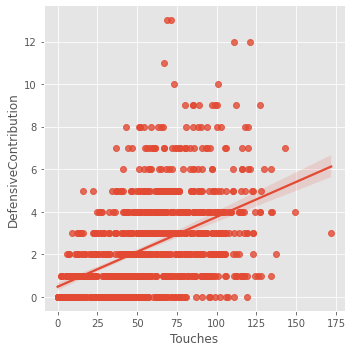

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between touches, tackles, interceptions, and blocks
corr_matrix = data[['Touches', 'DefensiveContribution']].corr()
# print the correlation between these variables as number
print("the correlation between touches and DefensiveContribution is: {:.2f}".format(corr_matrix.iloc[0,1]))
# Create scatterplots and regression lines for each defensive metric
sns.lmplot(x='Touches', y='DefensiveContribution', data=data)

In [6]:
# get the uniqe player names
player_names = data["Player"].unique()
print(len(player_names))
player_df = pd.DataFrame()
# plot the scatter plot for each player 
for player in player_names:
    # get the data for each player
    player_data = data[data["Player"] == player]
    # get average touches and average DefensiveContribution for each player
    avg_touches = player_data["Touches"].mean()
    avg_DefensiveContribution = player_data["DefensiveContribution"].mean()
    # insert in dataframe player_df
    new_row = {"Player": player, "Touches": avg_touches, "DefensiveContribution": avg_DefensiveContribution}
    player_df = pd.concat([player_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)


player_df.describe()



58


,Touches,DefensiveContribution
count,58.000000,58.000000
mean,42.553685,1.912983
std,27.937121,1.434909
min,1.000000,0.000000
25%,16.515625,0.843750
50%,38.706294,1.568182
75%,67.391304,2.924612
max,95.469697,5.270270


In [7]:
player_df

,Player,Touches,DefensiveContribution
0,Diogo Jota,39.230769,1.948718
1,Roberto Firmino,15.307692,1.153846
2,Sadio Mané,46.682540,2.555556
3,Mohamed Salah,48.109375,0.890625
4,Naby Keïta,57.523810,5.238095
5,Harvey Elliott,17.000000,1.500000
6,James Milner,74.000000,4.950000
7,Alex Oxlade-Chamberlain,38.181818,2.272727
8,Fabinho,24.600000,1.400000
9,Kostas Tsimikas,81.555556,4.222222


In [8]:
# remove who has less than 15 touches
# count the number of players who has less than 15 touches
print(player_df.shape)
print("Number of players who has less than 15 touches: {}".format(player_df[player_df["Touches"] < 15.0].shape[0]))
# remove them but update the index
player_df = player_df[player_df["Touches"] >= 15.0].reset_index(drop=True)
print(player_df.shape)
print("Number of players who has less than 15 touches: {}".format(player_df[player_df["Touches"] < 15.0].shape[0]))


(58, 3)
Number of players who has less than 15 touches: 12
(46, 3)
Number of players who has less than 15 touches: 0


In [9]:
player_df

,Player,Touches,DefensiveContribution
0,Diogo Jota,39.230769,1.948718
1,Roberto Firmino,15.307692,1.153846
2,Sadio Mané,46.682540,2.555556
3,Mohamed Salah,48.109375,0.890625
4,Naby Keïta,57.523810,5.238095
5,Harvey Elliott,17.000000,1.500000
6,James Milner,74.000000,4.950000
7,Alex Oxlade-Chamberlain,38.181818,2.272727
8,Fabinho,24.600000,1.400000
9,Kostas Tsimikas,81.555556,4.222222


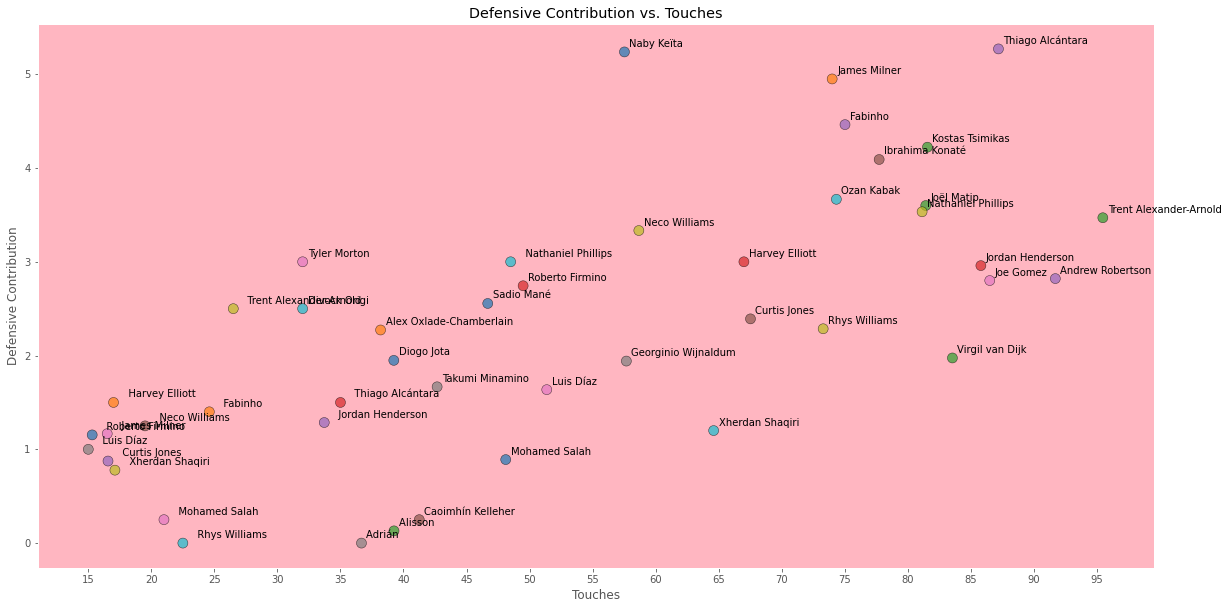

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame 'player_df'

color_map = plt.cm.get_cmap('tab10', len(player_df))

# Scatter plot
plt.scatter(player_df["Touches"], player_df["DefensiveContribution"], c=np.arange(len(player_df)), cmap=color_map, s=100, edgecolors='black', alpha=0.7)

# Generate a color map based on the number of data points

# Scatter plot with unique colors

# Add labels to the data points with an offset
for i in range(len(player_df)):
    plt.annotate(player_df["Player"][i], (player_df["Touches"][i], player_df["DefensiveContribution"][i]), xytext=(5,5), textcoords='offset points')


# icrease the ticks in x-axis
plt.xticks(np.arange(15, 100, 5))

# increase the figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Set plot title and labels
plt.title("Defensive Contribution vs. Touches")
plt.xlabel("Touches")
plt.ylabel("Defensive Contribution")

# Set background color and grid lines
plt.gca().set_facecolor('lightpink')
# remove grid lines
plt.grid(False)
# Display the plot
plt.show()


>Player Performance Evaluation:
* By understanding the correlation between the number of touches and defensive contributions, the club can assess player performance more comprehensively. They can identify players who excel in defensive contributions based on their touches and utilize this information for player evaluations, contract negotiations, and squad selection.

>Tactical Decision-Making:
* The analysis highlights the importance of players with a high number of touches in terms of defensive contributions. Coaches and managers can utilize this information to devise tactical strategies that maximize defensive effectiveness. For example, they might focus on involving players with more touches in defensive situations or positional setups that allow these players to contribute more defensively.

>Recruitment and Transfers:
* When scouting and recruiting new players or considering transfer options, the club can take this analysis into account. They can prioritize players who not only have a high number of touches but also demonstrate a strong defensive contribution. This can help in identifying potential signings that align with the team's tactical and defensive requirements.

>Player Development:
* The analysis can also guide player development programs. The club can emphasize skill training and tactical awareness for players who have a high number of touches but a comparatively lower defensive contribution. By addressing this gap, the players can improve their defensive skills and become more well-rounded assets to the team.

>Team Strategy:
* The correlation between touches and defensive contributions suggests that a team's possession-oriented style of play might positively impact defensive performance. The club can consider adopting or refining such strategies that prioritize ball control and player involvement, leading to both offensive and defensive benefits.


### In summary, this suggests that players who are more involved in the game, as measured by their number of touches, tend to also make more defensive contributions, such as tackles, interceptions, and blocks. However, it's important to note that correlation does not imply causation, and there could be other factors that influence both the number of touches a player has and their defensive contributions.